In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df = train_data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
def countplots(data, feature,perc):
  ax = sns.countplot(data = df, x = feature)
  plt.xticks(rotation = 90)
  for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / len(data[feature])
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
  plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


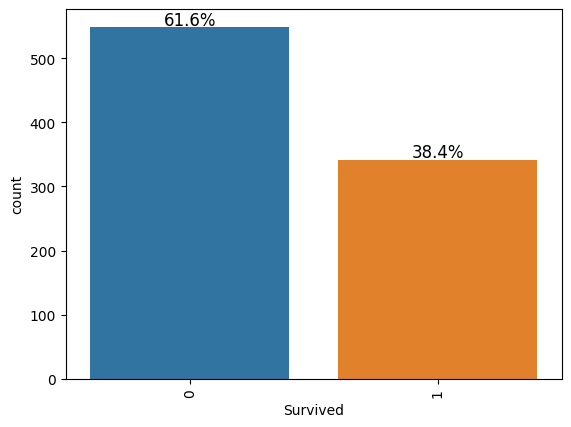

In [12]:
countplots(df,'Survived', perc = True)

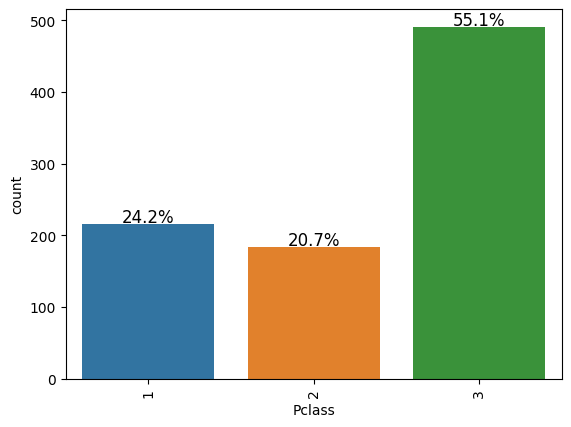

In [13]:
countplots(df, 'Pclass', perc = True)

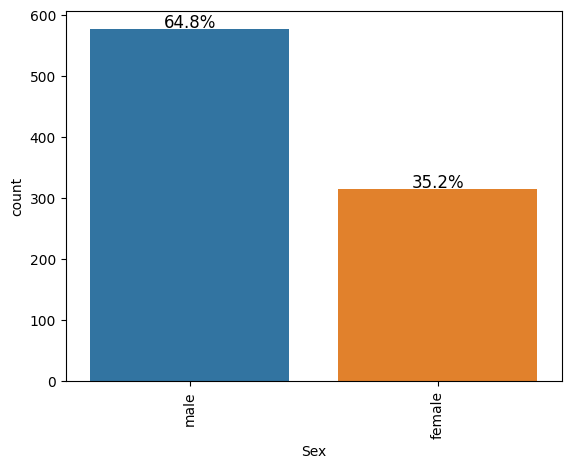

In [14]:
countplots(df,'Sex', perc = True)

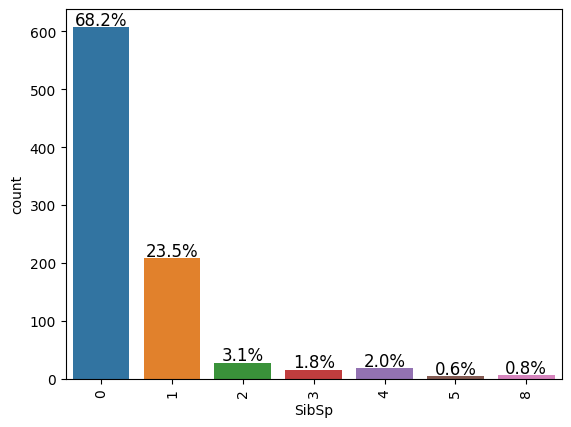

In [15]:
countplots(df,'SibSp', perc = True)

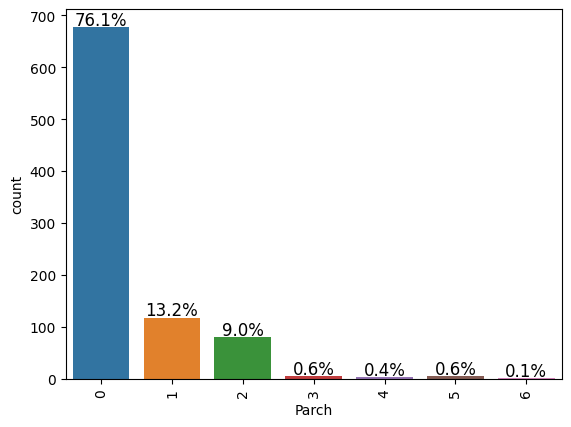

In [16]:
countplots(df,'Parch', perc = True)

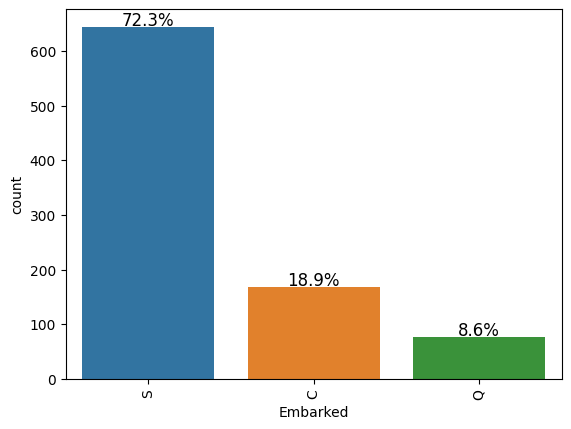

In [17]:
countplots(df,'Embarked', perc = True)

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


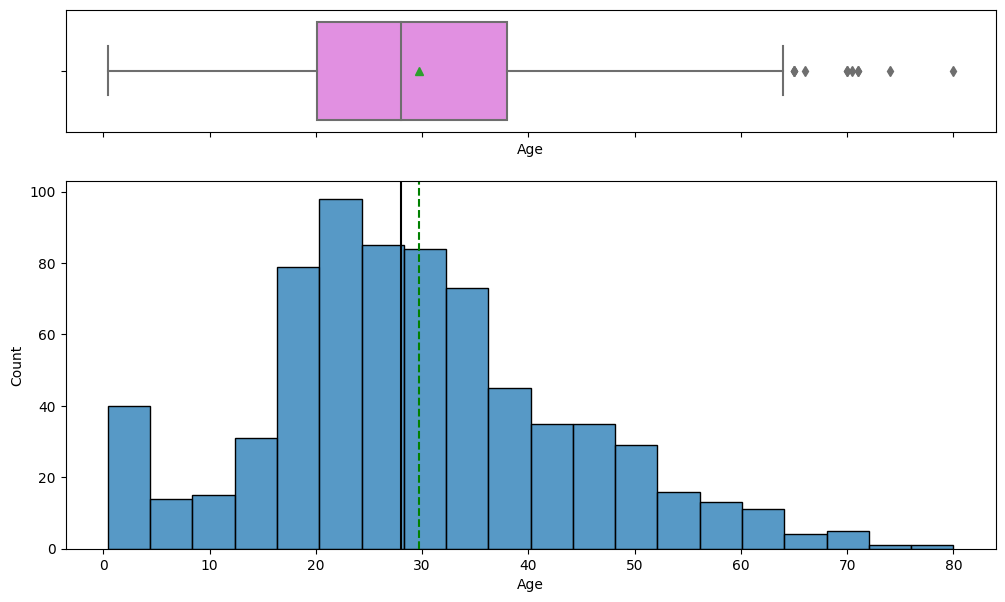

In [19]:
histogram_boxplot(df, 'Age')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


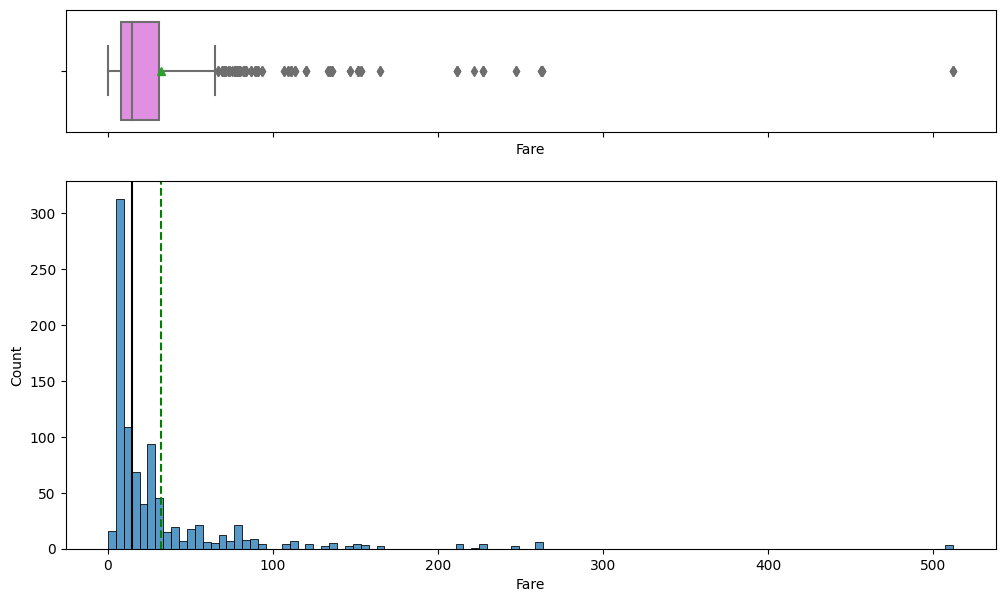

In [20]:
histogram_boxplot(df, 'Fare')

In [21]:
numerical = df.select_dtypes(include=['number'])

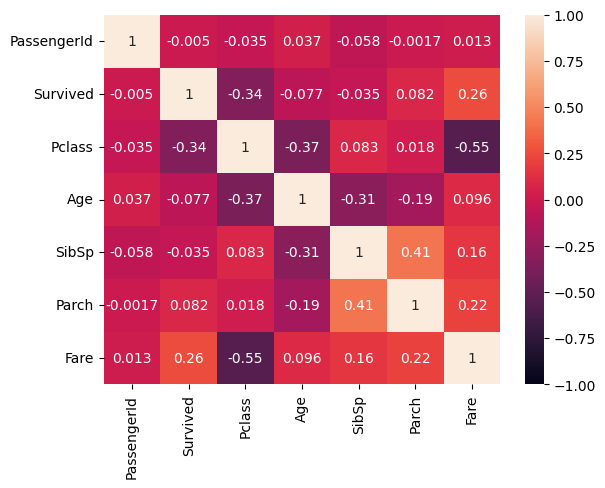

In [22]:
sns.heatmap(data = numerical.corr(),annot=True,vmin=-1,vmax=1);

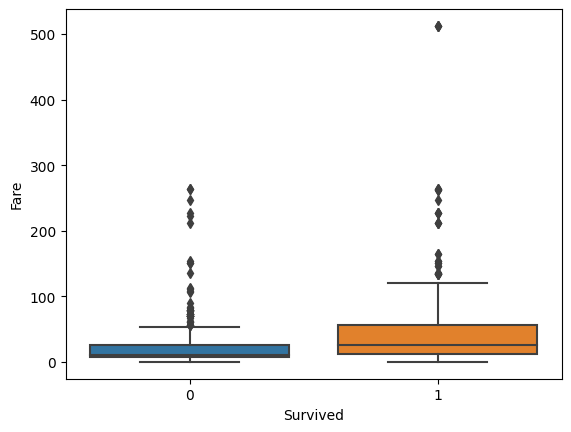

In [23]:
sns.boxplot(df, x = 'Survived', y = "Fare");

In [24]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Survived    0    1  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
------------------------------------------------------------------------------------------------------------------------


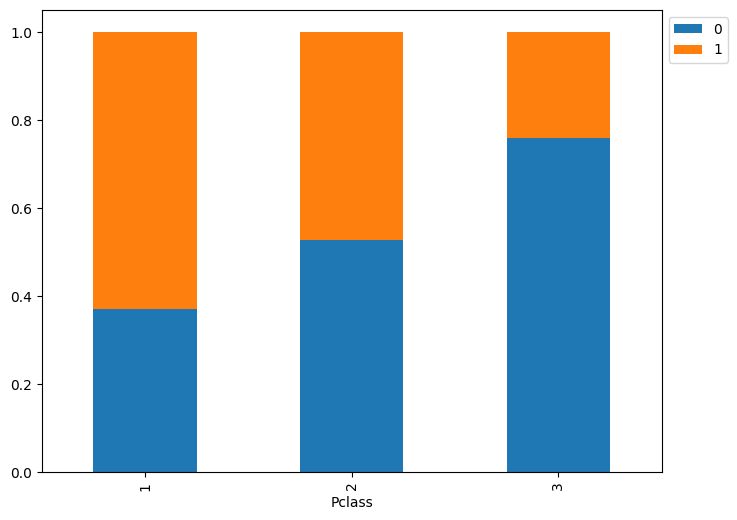

In [25]:
stacked_barplot(df,'Pclass' ,'Survived')

Survived    0    1  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
------------------------------------------------------------------------------------------------------------------------


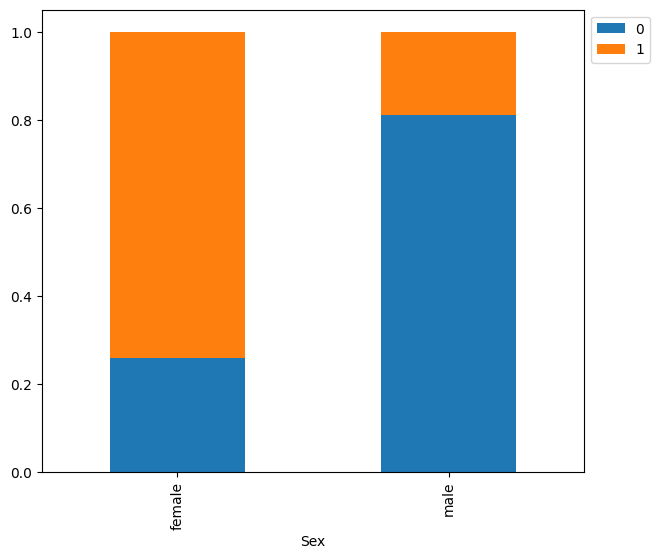

In [26]:
stacked_barplot(df,'Sex' ,'Survived')

Sex     female  male  All
Pclass                   
All        314   577  891
3          144   347  491
1           94   122  216
2           76   108  184
------------------------------------------------------------------------------------------------------------------------


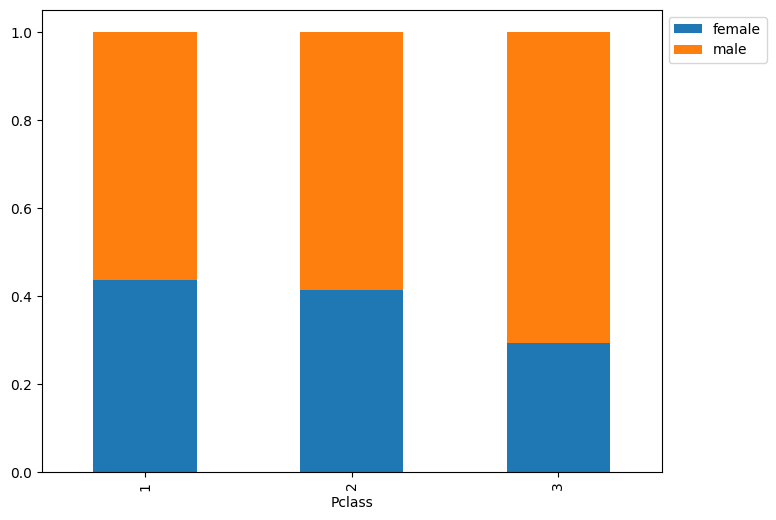

In [27]:
stacked_barplot(df,'Pclass' ,'Sex')

Survived    0    1  All
Embarked               
All       549  340  889
S         427  217  644
C          75   93  168
Q          47   30   77
------------------------------------------------------------------------------------------------------------------------


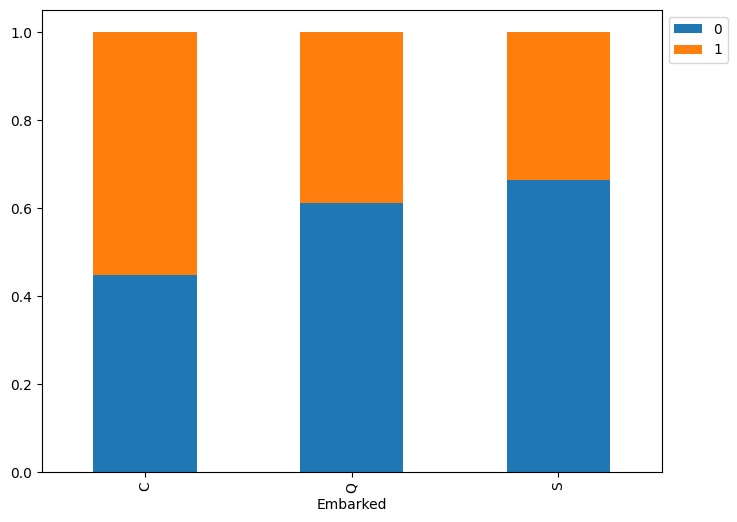

In [28]:
stacked_barplot(df,'Embarked' ,'Survived')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1282: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


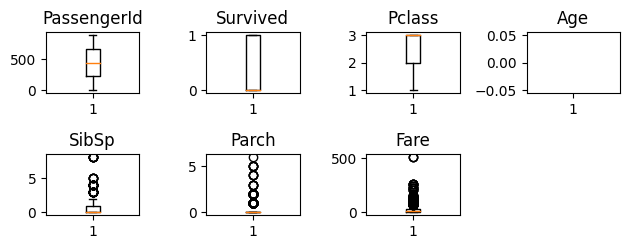

In [29]:
for i, variable in enumerate(numerical):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
#df = df.drop('Name', axis = 1)

In [32]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [33]:
df = df.drop(['SibSp', 'Parch'], axis = 1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [35]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [36]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,PassengerId,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,True,False,True
1,2,1,38.0,71.2833,False,False,False
2,3,3,26.0,7.9250,False,False,True
3,4,1,35.0,53.1000,False,False,True
4,5,3,35.0,8.0500,True,False,True


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

In [38]:
print("Number of rows in train data =", X_train.shape)
print("Number of rows in val data =", X_val.shape)

Number of rows in train data = (623, 7)
Number of rows in val data = (268, 7)


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [40]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

In [41]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Age            0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [43]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("Val performance:\n",d_tree_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Val performance:
    Accuracy    Recall  Precision        F1
0  0.735075  0.640777       0.66  0.650246


In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [48]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'criterion': ['gini', 'entropy'],
    'class_weight' : ['balanced'],
    'max_depth': np.arange(2,8),
    'min_samples_leaf': [15,20,25],
    'max_leaf_nodes' : [10,12,14,16],
    'min_samples_split': [10, 15, 20],
    'min_impurity_decrease': [0.0001,0.001],
    'ccp_alpha': [0.0001, 0.001, 0.01]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score, average='weighted')

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_leaf_nodes=12,
                       min_impurity_decrease=0.0001, min_samples_leaf=15,
                       min_samples_split=10, random_state=1)

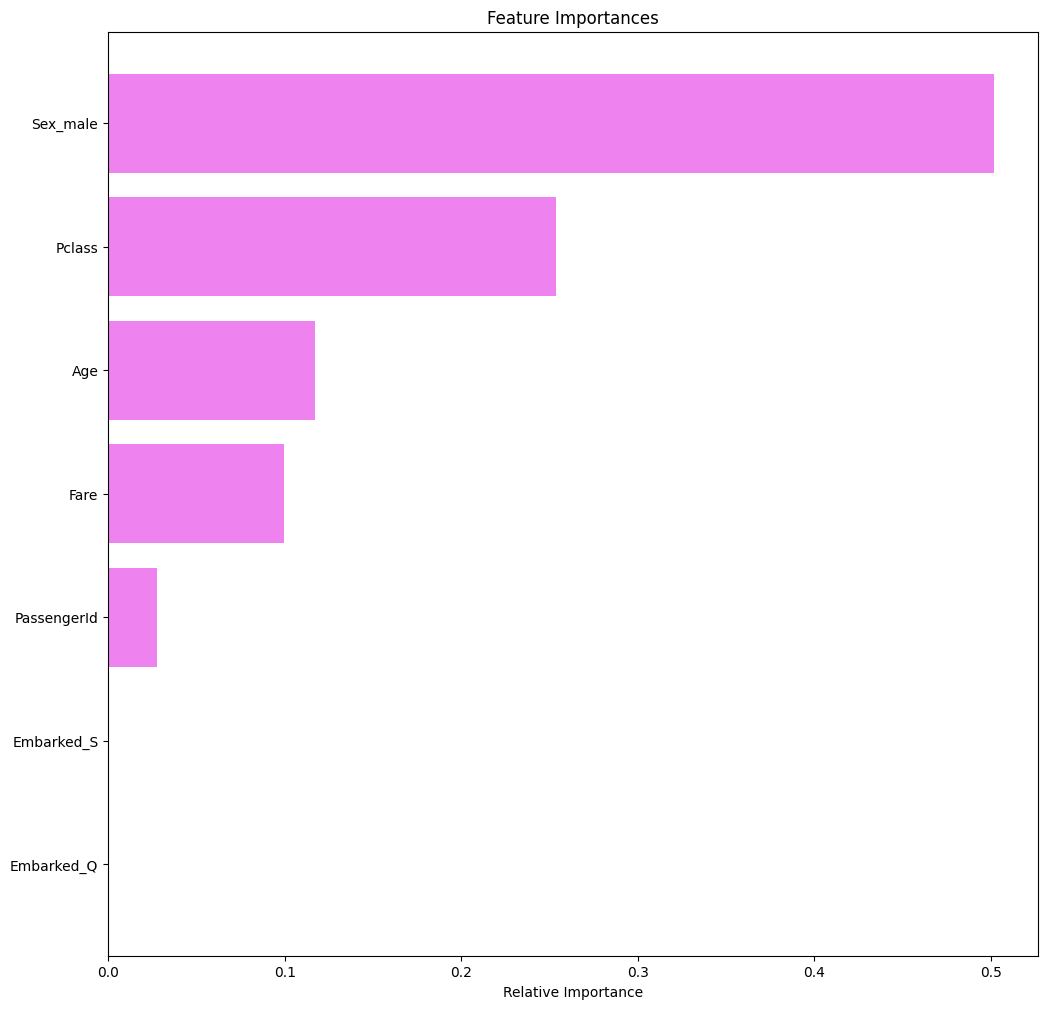

In [49]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Training performance:
    Accuracy    Recall  Precision        F1
0  0.845907  0.757322   0.826484  0.790393
Val performance:
    Accuracy    Recall  Precision       F1
0  0.798507  0.669903   0.775281  0.71875


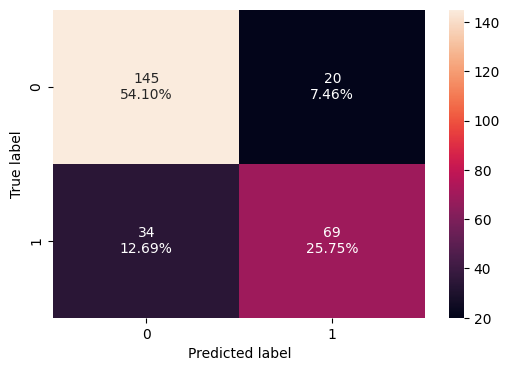

In [50]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_val,y_val)
print("Val performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_val,y_val)

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Val performance:
    Accuracy    Recall  Precision        F1
0  0.813433  0.660194   0.819277  0.731183


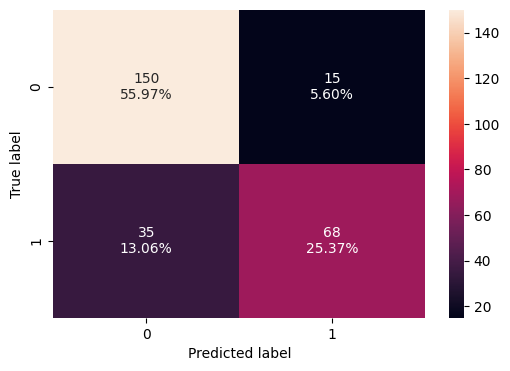

In [52]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("Val performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_val, y_val)

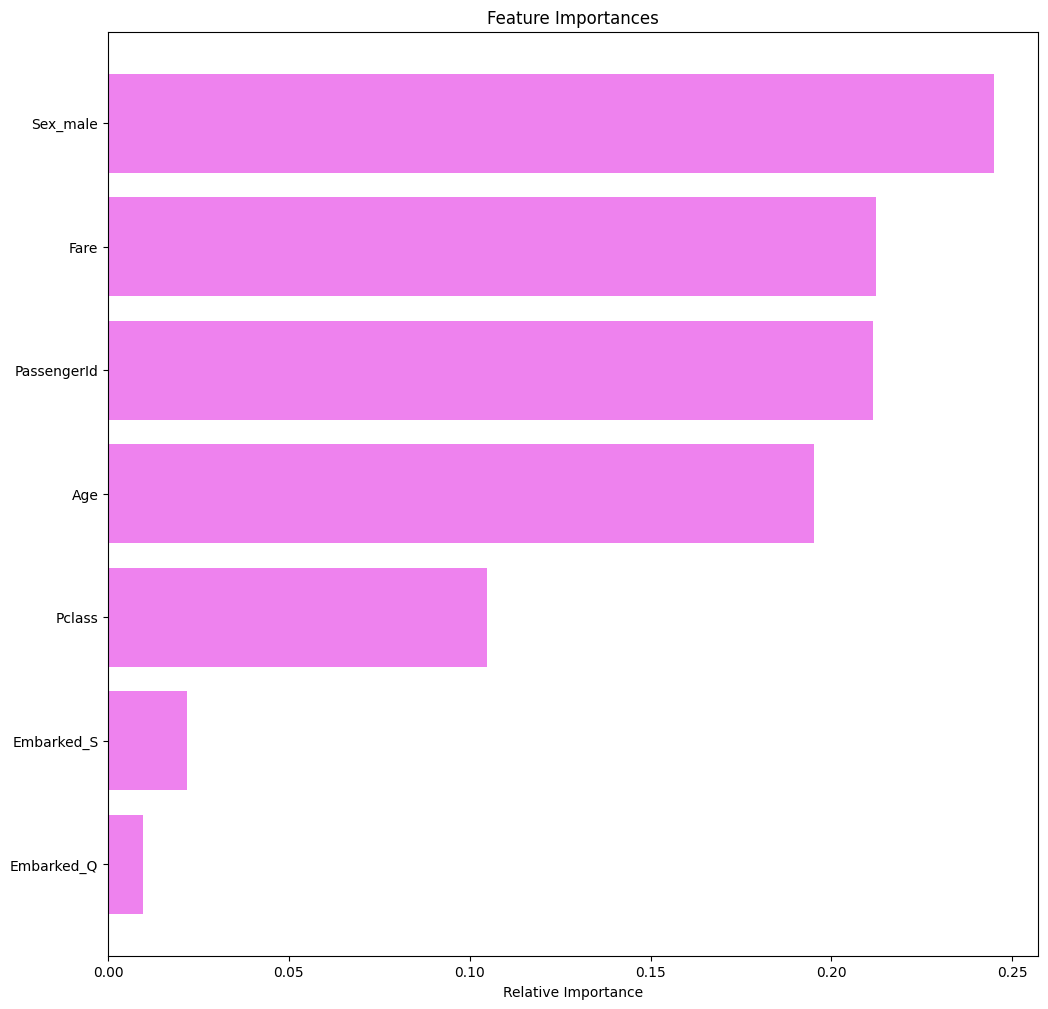

In [53]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [54]:
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {
    "class_weight": ['balanced'],
    "n_estimators": [25,50,75],
    "min_samples_leaf": [10,15,20],
    "max_depth": [10, 15, 20],
    "max_features": [0.5,'sqrt','log2',None],
    "min_impurity_decrease" : [0.0001,0.001],
    'ccp_alpha': [0.0001, 0.001, 0.01],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score, average='weighted')

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced', max_depth=10,
                       max_features=0.5, max_samples=0.4,
                       min_impurity_decrease=0.0001, min_samples_leaf=10,
                       n_estimators=25, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.802568  0.790795   0.721374  0.754491
Val performance:
    Accuracy    Recall  Precision        F1
0  0.791045  0.747573   0.719626  0.733333


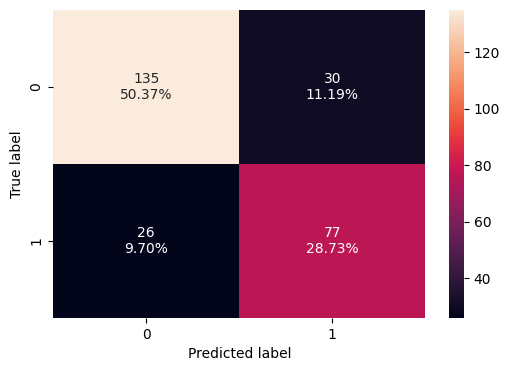

In [55]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_val,y_val)
print("Val performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.921348  0.849372   0.939815  0.892308
Val performance:
    Accuracy    Recall  Precision        F1
0  0.820896  0.679612   0.823529  0.744681


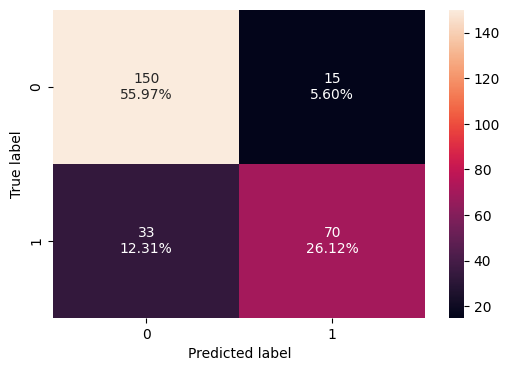

In [56]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("Val performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_val,y_val)

In [57]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,75,100),
    "learning_rate": [0.005,0.01],
    "max_depth": [3,4],
    "max_features":[0.3,0.4],
    "min_impurity_decrease": [0.0001, 0.001],
    "ccp_alpha": [0.001, 0.01],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [5,10],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.001, learning_rate=0.01, max_depth=4,
                           max_features=0.3, min_impurity_decrease=0.0001,
                           min_samples_leaf=5, n_estimators=50, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.800963  0.502092       0.96  0.659341
Val performance:
    Accuracy    Recall  Precision        F1
0  0.794776  0.504854   0.928571  0.654088


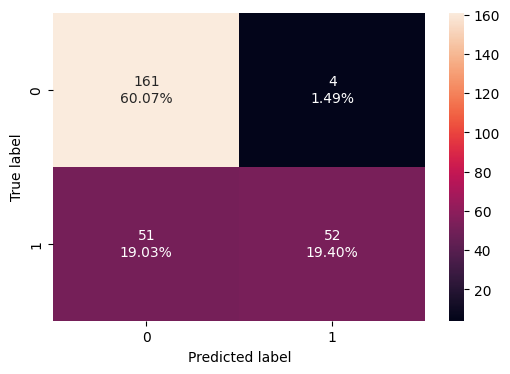

In [58]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_val,y_val)
print("Val performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_val,y_val)

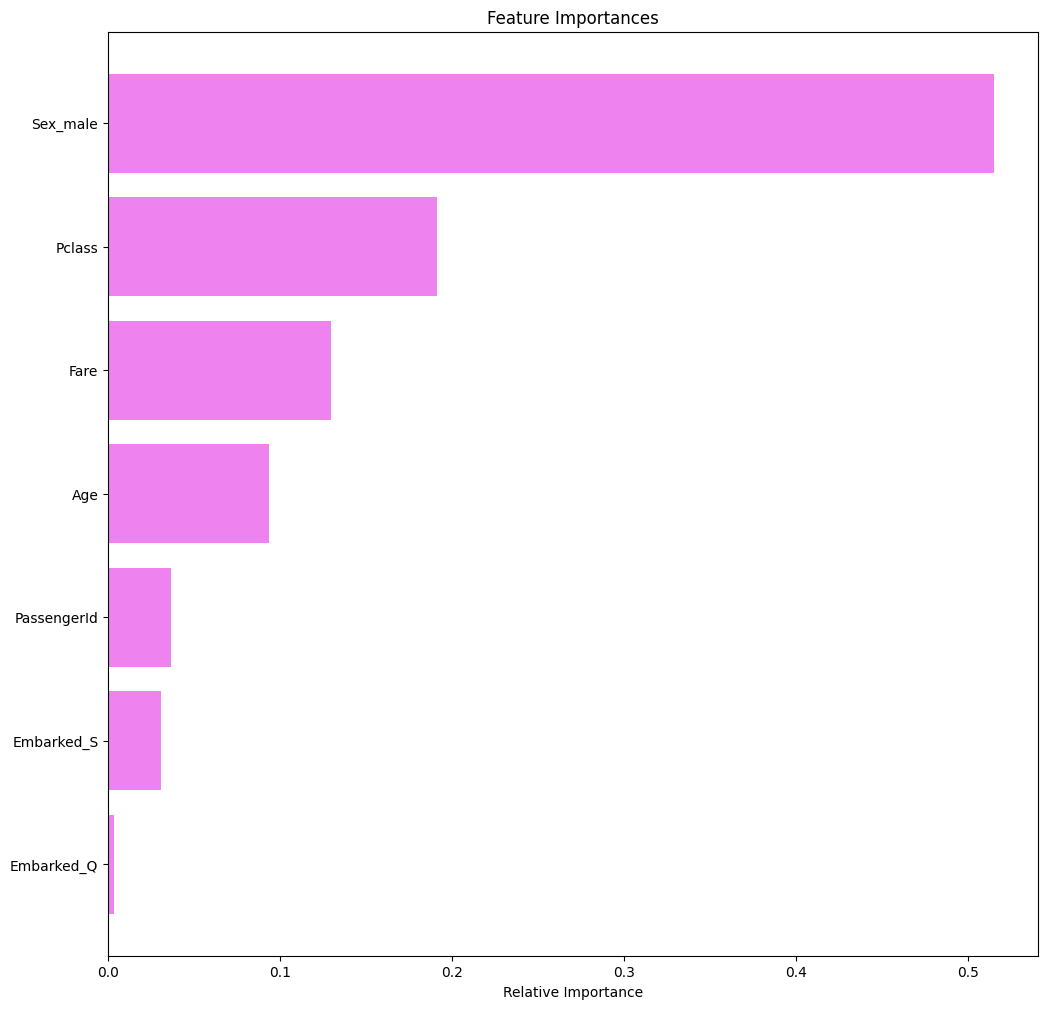

In [59]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
test_data_1 = test_data.drop(['Name','Ticket','Cabin','SibSp','Parch'], axis = 1)

In [62]:
 X_test = test_data_1.copy()

In [63]:
X_test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,male,34.5,7.8292,Q
1,893,3,female,47.0,7.0000,S
2,894,2,male,62.0,9.6875,Q
3,895,3,male,27.0,8.6625,S
4,896,3,female,22.0,12.2875,S
...,...,...,...,...,...,...
413,1305,3,male,NaN,8.0500,S
414,1306,1,female,39.0,108.9000,C
415,1307,3,male,38.5,7.2500,S
416,1308,3,male,NaN,8.0500,S


In [64]:
X_test = pd.get_dummies(X_test, drop_first = True)
X_test.head()

,PassengerId,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,7.8292,True,True,False
1,893,3,47.0,7.0000,False,False,True
2,894,2,62.0,9.6875,True,True,False
3,895,3,27.0,8.6625,True,False,True
4,896,3,22.0,12.2875,False,False,True


In [65]:
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

In [66]:
y_pred = gbc_tuned.predict(X_test)

In [67]:
X_test['Survived'] = y_pred

In [68]:
selected_columns = X_test[['PassengerId', 'Survived']]

In [69]:
selected_columns.to_csv('selected_columns.csv', index=False)

In [70]:
from IPython.display import FileLink

# Path to your file
file_path = 'selected_columns.csv'

# Generate and display the download link
FileLink(file_path)

/kaggle/working/selected_columns.csv